# Question 1

The following is the code to find the maximum  Log of odds and the value of recombination for that. 

f_linked_1 is the theta function for case a

f_linked_2 is the theta function for case b

f_linked_3 is the theta function for case c


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import binom_test
from scipy.stats import norm

In [ ]:
def f_linked_1(theta):
  return ((((1-theta)/2)**5) * theta/2)

def f_linked_2(theta):
  return ((1-theta)/2)**6

In [ ]:
def f_linked_3(theta):
  r = (theta)/2
  nr = (1-theta)/2
  func1 = (0.6*nr+0.4*r)*0.5*(r**5)
  func2 = (0.6*nr+0.4*r)*0.5*(nr**5)
  return (func1+func2)

In [ ]:
p_unlinked_1 = f_linked_1(0.5)
p_unlinked_2 = f_linked_2(0.5)
p_unlinked_3 = f_linked_3(0.5)
z_theta_1 = []
z_theta_2 = []
z_theta_3 = []

for i in np.linspace(0,0.4,400):
  z_theta_1.append(np.log10(f_linked_1(i)/p_unlinked_1))
  z_theta_2.append(np.log10(f_linked_2(i)/p_unlinked_2))
  z_theta_3.append(np.log10(f_linked_3(i)/p_unlinked_3))

print("a. Max is at - " + str(z_theta_1.index(max(z_theta_1))*0.001))
print("    The value is - "+str(max(z_theta_1)))
print("b. Max is at - " + str(z_theta_2.index(max(z_theta_2))*0.001))
print("    The value is - "+str(max(z_theta_2)))
print("c. Max is at - " + str(z_theta_3.index(max(z_theta_3))*0.001))
print("    The value is - "+str(max(z_theta_3)))


a. Max is at - 0.166
    The value is - 0.6321219036489175
b. Max is at - 0.0
    The value is - 1.806179973983887
c. Max is at - 0.0
    The value is - 1.2833012287035497


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


From the above equations, we see that none of the z scores cross 3.8 which is the significance threshold. **Thus, the marker locus is not associated with the disease locus in all cases**

## Question 3

**a. Use R (or any program you are comfortable with) to write a program to conduct TDT test for each locus. Which allele at which locus is most likely to be associated with Autism?**\

The following is the code to read and conduct a TDT test for each locus. 

In [ ]:
trio_file = pd.read_csv("trio.ped",delimiter = "\t", header = 0)

In [ ]:
def tdt_test(trio_df):
  A_a = 0
  A_A = 0
  a_A = 0
  a_a = 0
  family_id = 0
  snp_str = "snp"
  for j in range(1,11):
    A_a = 0
    A_A = 0
    a_A = 0
    a_a = 0
    snp_str="snp"
    snp_str+=str(j)
    snp_data = trio_df[[snp_str+'_1',snp_str+'_2']]
    for i in range(0,len(trio_df),3):
      father = [snp_data[snp_str+'_1'].iloc[i],snp_data[snp_str+'_2'].iloc[i]]
      mother = [snp_data[snp_str+'_1'].iloc[i+1],snp_data[snp_str+'_2'].iloc[i+1]]
      child = [snp_data[snp_str+'_1'].iloc[i+2],snp_data[snp_str+'_2'].iloc[i+2]]
      temp_a_a,temp_a_A,temp_A_a,temp_A_A=cases(father,mother,child)
      #mother.append([snp_data['snp1_1'].iloc[i],snp_data['snp1_2'].iloc[i]])
      #child.append([snp_data['snp1_1'].iloc[i],snp_data['snp1_2'].iloc[i]])
      a_a+=temp_a_a
      a_A+=temp_a_A
      A_a+=temp_A_a
      A_A+=temp_A_A
    chi_square = ((A_a-a_A)**2)/(a_A+A_a)
    print(snp_str)
    print("Chi-Square - " + str(chi_square))
    print("Odds Ratio - " + str(A_a/a_A))
    #print(a_a,a_A,A_a,A_A)
    print('---')

def cases(father,mother,child):
  A_a = 0
  A_A = 0
  a_A = 0
  a_a = 0
  gene_from_father = 0
  gene_from_mother = 0

  # Assuming 1 is a and 2 is A
  if father[0] == father[1] and father[0]==1:
    a_a+=1
    gene_from_father = 1

  elif father[0]== father[1] and father[0]==2:
    A_A+=1
    gene_from_father = 2

  if mother[0] == mother[1] and mother[0]==1:
    a_a+=1
    gene_from_mother = 1

  elif mother[0]== mother[1] and mother[0]==2:
    A_A+=1
    gene_from_mother = 2
  
  if gene_from_father !=0 and gene_from_mother ==0:
    if child[0]==gene_from_father:
      gene_from_mother = child[1]
      if gene_from_mother ==1:
        a_A+=1
      else:
        A_a+=1
    else:
      gene_from_mother = child[0]
      if gene_from_mother ==1:
        a_A+=1
      else:
        A_a+=1
    
  if gene_from_father == 0 and gene_from_mother != 0:
    if child[0]==gene_from_mother:
      gene_from_father = child[1]
      if gene_from_father ==1:
        a_A+=1
      else:
        A_a+=1
    else:
      gene_from_father = child[0]
      if gene_from_father ==1:
        a_A+=1
      else:
        A_a+=1

  if gene_from_father == 0 and gene_from_mother == 0:
    if child[0]!=child[1]:
      a_A+=1
      A_a+=1
    elif child[0]==1:
      gene_from_father = 1
      gene_from_mother = 1
      a_A+=2
    else:
      A_a+=2

  return a_a,a_A,A_a,A_A

In [ ]:
tdt_test(trio_file)


snp1
Chi-Square - 0.0
Odds Ratio - 1.0
---
snp2
Chi-Square - 0.0
Odds Ratio - 1.0
---
snp3
Chi-Square - 0.6666666666666666
Odds Ratio - 0.8461538461538461
---
snp4
Chi-Square - 0.6666666666666666
Odds Ratio - 0.8461538461538461
---
snp5
Chi-Square - 0.30120481927710846
Odds Ratio - 1.1282051282051282
---
snp6
Chi-Square - 0.8526315789473684
Odds Ratio - 0.8269230769230769
---
snp7
Chi-Square - 1.8
Odds Ratio - 1.8571428571428572
---
snp8
Chi-Square - 2.3333333333333335
Odds Ratio - 2.0
---
snp9
Chi-Square - 2.909090909090909
Odds Ratio - 2.142857142857143
---
snp10
Chi-Square - 1.3888888888888888
Odds Ratio - 0.7560975609756098
---


We see that snp9 has the most significant result of 2.909. This is not above the p value of 0.05 but out of all the snps, this is the most significant result. We also see that the odds ratio for this case is 2.14 (for allele 2) This means that allele 2 is more associated with the disease than allele 1. 

**Thus the most significant result is - Allele 2 at SNP 9** 

**b. Do the test when father genotype is missing**

The following is the code to run 1tdt test based on Sun et. al. 1999



In [ ]:
def tdt_1_test(trio_df):
  a_trans = np.zeros([3,3])
  snp_str = "snp"
  for j in range(1,11):
    a_trans = np.zeros([3,3])
    snp_str="snp"
    snp_str+=str(j)
    snp_data = trio_df[[snp_str+'_1',snp_str+'_2']]
    
    for i in range(0,len(trio_df),3):
      mother = [snp_data[snp_str+'_1'].iloc[i+1],snp_data[snp_str+'_2'].iloc[i+1]]
      child = [snp_data[snp_str+'_1'].iloc[i+2],snp_data[snp_str+'_2'].iloc[i+2]]
      a_trans+=tdt_1_estimators(mother,child)
      #mother.append([snp_data['snp1_1'].iloc[i],snp_data['snp1_2'].iloc[i]])
      #child.append([snp_data['snp1_1'].iloc[i],snp_data['snp1_2'].iloc[i]])

    b1 = a_trans[0][1] + a_trans[1][2]
    c1 = a_trans[1][0] + a_trans[2][1]
    chi_square = (b1-c1)/np.sqrt(b1+c1)
    p_value = norm.sf(chi_square) 
    print(snp_str)
    print("T1 - " + str(abs(chi_square)))
    print("P-value - " + str(p_value))
    print('---')

def tdt_1_estimators(mother,child):
  a_trans = np.zeros([3,3])
  left = -1
  right =-1

  if mother[0] == mother[1]:

    if mother[0] == 1:
      right = 0
      if child [0] == child[1] and child[0] == 1:
        left = 0
      elif child [0] == child[1] and child[0] == 2:
        left = 2
      else:
        left = 1

    else:
      right = 2

      if child [0] == child[1] and child[0] == 1:
        left = 0
      elif child [0] == child[1] and child[0] == 2:
        left = 2
      else:
        left = 1

  else:
    right = 1

    if child [0] == child[1] and child[0] == 1:
      left = 0
    elif child [0] == child[1] and child[0] == 2:
      left = 2
    else:
      left = 1
    
  a_trans[left][right] +=1 

  return a_trans

In [ ]:
tdt_1_test(trio_file)

snp1
T1 - 1.4605934866804429
P-value - 0.07206351740800766
---
snp2
T1 - 1.0690449676496976
P-value - 0.14252470370130638
---
snp3
T1 - 1.6035674514745464
P-value - 0.05440471502027284
---
snp4
T1 - 1.4569855927715483
P-value - 0.0725601786034685
---
snp5
T1 - 0.565685424949238
P-value - 0.7141961775233342
---
snp6
T1 - 1.6035674514745464
P-value - 0.05440471502027284
---
snp7
T1 - 0.6324555320336759
P-value - 0.26354462843276905
---
snp8
T1 - 0.6324555320336759
P-value - 0.26354462843276905
---
snp9
T1 - 0.6324555320336759
P-value - 0.26354462843276905
---
snp10
T1 - 0.1643989873053573
P-value - 0.4347085303706196
---


We see that the significant results from the previous test(where bitht the parents genotypes were known) are not significant anymore. This shows the loss of power we have when moving from the tdt to the 1-tdt test. 

**The most significant result here is at Snp 3 and Snp 6**

# Question 4

All the analysis was done using plink. The code over here is used to further analyse the data and answer the questions asked

**A. In the candidate region, how many SNP loci had MAF< 0.05, and how many had genotype missing rate <0.05?**

The commands for this in plink is\
$plink --file PH --freq --allow-no-sex\
This gives us the file maf_frq which is used in the code below -

In [ ]:
freq_file = '/content/drive/MyDrive/BSTA 787/maf_frq.csv'
freq_df = pd.read_csv(freq_file,header = 0)

freq_df_maf = freq_df[freq_df['MAF']<0.05]

max_alleles = 564
missing_rate = 0.05
threshold = max_alleles*(1-missing_rate)
freq_df_gmr = freq_df[freq_df['NCHROBS']>threshold]

print("The number of SNP loci with MAF less than 0.05 is - " + str(len(freq_df_maf)))
print("The number of SNP loci with Genotype missing rate lesser than 0.05 is - " + str(len(freq_df_gmr)))

The number of SNP loci with MAF less than 0.05 is - 6319
The number of SNP loci with Genotype missing rate lesser than 0.05 is - 6758


**b. Test for HWE in controls for all SNPs. How many had p<0.0001?**

The command for this on plink is\
$plink --file PH --filter-controls --allow-no-sex --hardy\
The results were transfered to the 'hardy.csv' file and was analyzed as below

In [ ]:
hardy_file = '/content/drive/MyDrive/BSTA 787/hardy.csv'
hardy_df = pd.read_csv(hardy_file,header=0)

hardy_df = hardy_df[hardy_df['P']<0.0001]

print("The number of SNPs in controls for which p<0.0001 when HWE is tested is  - " + str(len(hardy_df)))

The number of SNPs in controls for which p<0.0001 when HWE is tested is  - 2


**c. Check and evaluate the LD between rs7757956 and rs932477**

Command -\
$plink --file PH --ld rs7757956 rs932477\
The following results are obtained for these snps. This shows that there is no linkage disequilibrium between these two SNPs. The R squared values are low and the genotype is as expected for linkage equilibrium.



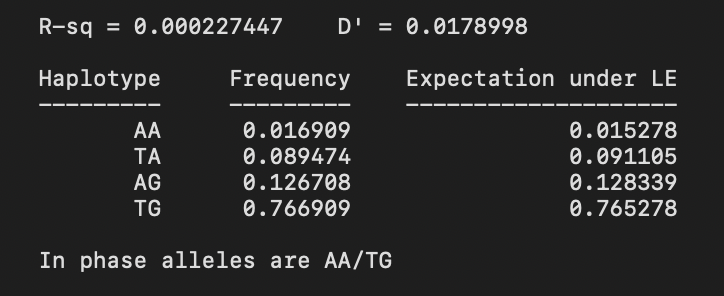

**d.  Pick the genotype rs1801132, tabulate the genotype counts vs. disease status, perform 
allelic and genotypic tests. What is your conclusion? Interpret the odds ratio and risk 
allele**

Command -\
$plink --file PH --fisher --model --counts

Based on the results, we can say
- Since the odds ratio is 8.34 in the favour of minor allele C, this allele is more at risk compared to A. Since the p-value is low, we can say that the minor allele is dominant.
- From the data, we can say since the pvalues for allelic test is low, it means that there is association between the disease and the minor allele. Based on the genotypic test p value (very low), we can say that there is an association between the genotype and the disease as well.

The following is the tabulation of genotype counts vs disease status and the p-values/counts of the different tests.

In [ ]:
gen_dis = pd.DataFrame({'aa':[46,10],'Aa':[35,65],'AA':[9,116]},index=['Affected','Non-Affected'])
gen_dis

,aa,Aa,AA
Affected,46,35,9
Non-Affected,10,65,116


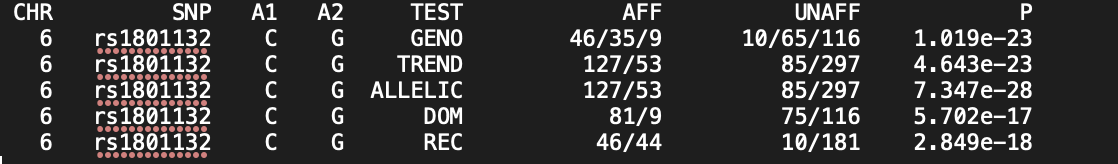

**e. Test the association of PH and each of the SNP within ESTR gene, assuming an additive 
model, adjusting for gender and age. Only report the results from the top 10 SNPs with 
the smallest p-values**

Command -\
$plink --file PH --logistic --covar PH.cov --allow-no-sex

In [ ]:
ph_assoc_file = '/content/drive/MyDrive/BSTA 787/ph_assoc_logistic.csv'
ph_assoc_df = pd.read_csv(ph_assoc_file,header = 0)
ph_assoc_df = ph_assoc_df.sort_values(by=['P'])
print("The most significant 10 SNPs are tabulated here - ")
ph_assoc_df[:10]

The most significant 10 SNPs are tabulated here - 


,CHR,SNP,BP,A1,TEST,NMISS,OR,STAT,P
1656,6,rs2747647,0,C,ADD,279,34.660,8.687,3.730000e-18
1833,6,rs2813495,0,C,ADD,282,8.805,8.431,3.420000e-17
1137,6,rs1801132,0,C,ADD,281,7.841,8.169,3.110000e-16
2826,6,rs35060990,0,C,ADD,282,59.730,7.787,6.870000e-15
1944,6,rs2813536,0,C,ADD,281,2.247,4.327,1.510000e-05
5346,6,rs827419,0,C,ADD,282,2.152,4.204,2.620000e-05
1086,6,rs17304585,0,T,ADD,282,3.541,3.255,1.135000e-03
11685,6,chr6:152160286,152160286,G,ADD,282,3.018,3.216,1.298000e-03
11643,6,chr6:152158847,152158847,G,ADD,282,3.018,3.216,1.298000e-03
10854,6,chr6:152133622,152133622,G,ADD,282,3.273,3.122,1.795000e-03
